# Kaggle DataSet: DataAnalyst - Job

## Description
### Abstract

#### Looking for a job as Data Analyst? Maybe this dataset can help you.

### About this dataset

Amidst the pandemic many people lost their jobs, with this dataset it is possible to hone the job search so that more people in need can find employment.
This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

    - Salary Estimate
    - Location
    - Company Rating
    - Job Description

#### How to use

Find the best jobs by salary and company rating
Explore skills required in job descriptions
Predict salary based on industry, location, company revenue

### Table of Contents:

    1. Python Libraries & Settings
    2. Loading & Understanding the data
        2.1 Inspecting the dataframe
        2.2 Sumarizing data
        2.3 Deleting unnecessary columns
    3. Data Cleaning
        3.1 Dealing with '-1' and 'Unknown' values.
        3.2 Dealing with NaNs
        3.3 Feature Engineering (estimate salary)
        3.4 Reducing granularity
    4. Overall DataViz
    5. Questions/Hypotheses: Integrity
    6. Feature Engineering: Job Descriptions
    7. Perfumery: Cleanning data
    8. Looking for Latitude and Logitude: GeoCoder
   

## 1. Python Libraries & Settings

In [1]:
# Importing libs

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [2]:
# Setting parameters: display and graphics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## 2. Loading & Understanding the data

In [3]:
# Loading data

data = pd.read_csv('DataAnalyst.csv')
data.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


**It's quite troublesome working with collumns that contain capital letters and blank spaces. Let's change it:**

    From:  Type of ownership
    To: type_of_ownership

In [4]:
data.columns = data.columns.str.replace(" " , "_")  
data.columns = data.columns.str.lower()
data.head(3)

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [5]:
# Dropping unnecesary columns: unnamed_0
data.drop(columns={'unnamed:_0'}, inplace = True)

In [6]:
# Sumarizing data: using ProfileReport Lib

def overview(df):
    return ProfileReport(df, html={'style': {'full_width': True}}, sort="None")

In [7]:
overview(data)

**Lets display categorical unique's values lesser than 15** 

In [8]:
for column in data.columns:
    if data[column].nunique() <= 15:
        print('')
        print(column)
        print('')
        print('Uniques Values: ' + str(data[column].nunique()))
        print(data[column].value_counts())
        print('=-'*10)


size

Uniques Values: 9
51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: size, dtype: int64
=-=-=-=-=-=-=-=-=-=-

type_of_ownership

Uniques Values: 15
Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
Private Practice / Firm              9
School / School District             9
Franchise                            2
Self-employed                        2
Name: type_of_ownership, d

## 3. Data Cleanning

As we can see, many columns has '-1' value. Problably represents 'NaNs' values, except for 'easy_apply' columns, that is can represents 'False'.
In the same hand, many columns has 'Unknown' values. If we don't know, it's the same as 'NaN'.

Also, 'Revenue' has a great granularity, would be better change it for a small one, just like:

        Less than $1 million (USD)
    1 to $5 million (USD) + $5 to $10 million (USD)
        10 to $25 million (USD) + $25 to $50 million (USD)
    50 to $100 million (USD)

Than, let's fix it.

### 3.1 GENERAL

### 3.1.1 Dealing with '-1' and 'Unknown' values.

In [9]:
data['size'].replace('-1', 'Unknown', inplace=True)
data['type_of_ownership'].replace('-1', 'Unknown', inplace=True)
data['revenue'].replace('-1', 'Unknown / Non-Applicable', inplace=True)
data['easy_apply'].replace('-1', False, inplace=True)

data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

data['easy_apply'] = data['easy_apply'].astype(bool)

### 3.1.2 Dealing with NaNs values

Strategy:
    
    General --> Dop columns that contains more than 40% NaNs;
    Company_name --> Only 1, let's drop it. 
    Founded e HeadQuarter --> Does not influences our analysis. Let's keep them.
    Industry --> NaN Imputation: Let's look at companies that have the same size and revenue as que missing and and imput the most frequent (mode).
    Rating --> We are using the mean.
    Revenue, Sector, Size --> Mode
    Salary_Estimate --> Just one value. Lets check what job is, then replace for the 'mode' for that job. 
    

In [10]:
data.isnull().sum()

job_title               0
salary_estimate         1
job_description         0
rating                272
company_name            1
location                0
headquarters          172
size                    0
founded               660
type_of_ownership       0
industry              353
sector                353
revenue                 0
competitors          1732
easy_apply              0
dtype: int64

In [11]:
# Dropping more than 40% NaNs

[data.drop(columns=[column], inplace=True) for column in data.columns if data[column].isnull().sum()/(data.shape[0])*100 > 40]

[None]

### 3.2 SPECIFIC COLUMNS

### 3.2.1 Industry - 15.67% de NaNs

In [12]:
# Looking at 'size' and 'revenue' (Industry's NaNs)

data[data['industry'].isnull()].head(3)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,easy_apply
11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,"Fairfield, NJ",NaN,1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,False
21,Data Science Analyst,$37K-$66K (Glassdoor est.),"Job Description\nOur client, a music streaming...",NaN,MUSIC & Entertainment,"New York, NY","Marina del Rey, CA",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,False
24,Entry Level / Jr. Data Analyst,$37K-$66K (Glassdoor est.),Dash Technologies is an industry leading softw...,3.8,Dash Technologies Inc\n3.8,"New York, NY","Columbus, OH",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,False


In [13]:
data['industry'].value_counts().head(8)

IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Consulting                                 111
Computer Hardware & Software               111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Name: industry, dtype: int64

In [14]:
ind_null = data[data['industry'].isnull()]
ind_null.revenue.value_counts(1)

Unknown / Non-Applicable      0.858357
Less than $1 million (USD)    0.048159
$1 to $5 million (USD)        0.033994
$10 to $25 million (USD)      0.016997
$5 to $10 million (USD)       0.016997
$25 to $50 million (USD)      0.008499
$50 to $100 million (USD)     0.005666
$10+ billion (USD)            0.005666
$100 to $500 million (USD)    0.005666
Name: revenue, dtype: float64

In [15]:
# The missing values has '1 to 50 employees' Siza en 'Unkown' revenue. Let's use it as a parameter to replace 

ind_count = data.loc[(data['size'] == '1 to 50 employees') & (data['revenue'] == 'Unknown / Non-Applicable')]
ind_count.industry.value_counts().head(3)

IT Services               16
Staffing & Outsourcing    14
Consulting                 9
Name: industry, dtype: int64

In [16]:
data['industry'].replace(np.nan, 'IT Services', inplace = True)

### 3.2.2 Rating - 12.07% NaNs: Mean

In [17]:
rating_mean = data['rating'].mean()
data['rating'].replace(np.nan, rating_mean, inplace = True)

### 3.2.3 Sector, Renevue and Size: Mode

In [16]:
moda_sector = data['sector'].mode()
data['sector'].replace(np.nan, moda_sector[0], inplace = True)

moda_revenue = data['revenue'].mode()
data['revenue'].replace(np.nan, moda_revenue[0], inplace = True)

moda_size = data['size'].mode()
data['size'].replace(np.nan, moda_size[0], inplace = True)

### 3.2.4 Company_Name: Only 1, let's drop.

In [18]:
data.dropna(subset=['company_name'], inplace=True)

### 3.2.5 Salary_Estimate: Only 1. 

Let's check the job_title and then replace for the most frequent salary for that job title

In [19]:
data['job_title'].value_counts().head(20)

Data Analyst               404
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Quality Analyst        17
Data Analyst II             17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst III            11
Data Analyst I              11
Sr Data Analyst              9
Marketing Data Analyst       9
Data Management Analyst      8
Data Warehouse Analyst       8
Technical Data Analyst       7
SQL Data Analyst             7
Name: job_title, dtype: int64

In [20]:
data[data['salary_estimate'].isnull()] 

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,easy_apply
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),False


In [21]:
# It's a Management!! 

data_manag = data.loc[data['job_title'] == 'Data Management Analyst']
data_manag['salary_estimate'].value_counts().head(3)

$41K-$86K (Glassdoor est.)    2
$48K-$88K (Glassdoor est.)    1
$67K-$92K (Glassdoor est.)    1
Name: salary_estimate, dtype: int64

In [22]:
data['salary_estimate'].replace(np.nan, '$41K-$86K (Glassdoor est.)', inplace=True)

### 3.3 Salary_Estimate: Feature Engineering

That's a categorical feature, but a troublesome one.

Some of binning ranges is too high, look at these ranges could be grouped:
    
    31k-59k
    30k-54k
    35k-42k

But some of them are too high, look at these ranges:

    31k-100k
    49k-112k
    72k-127k

Then, let's just create Let's Create 3 columns (Min, Max e Mean).

In [23]:
data2 = data.copy()

In [24]:
import re

minn = []
maxx = []

data2.reset_index()
for val in data2.salary_estimate:
    valores = re.findall('[0-9]+', str(val))
    if valores:
        minn.append(str(valores[0]))
        maxx.append(str(valores[1]))

data2['min_salary'] = minn
data2['max_salary'] = maxx


data2[['min_salary', 'max_salary']] = data2[['min_salary', 'max_salary']].astype(int)


media = []
subdata = data2[['min_salary', 'max_salary']]
for x in subdata:
    operacao = (subdata.min_salary + subdata.max_salary)/2
    media.append(operacao)
data2['mean_salary'] = media[0]

In [25]:
data2[['min_salary', 'max_salary', 'mean_salary']].head(3)

,min_salary,max_salary,mean_salary
0,37,66,51.5
1,37,66,51.5
2,37,66,51.5


### 3.4 REDUCING GRANULARITY

### 3.4.1 Type_of_ownership: Aggregation (reducing granularity)

There is too many redundant values in that column. The biggest data values is classified as 'Private Company' and 'Public Company'. But when we check the values we can also see others 'private' business that can fit in the mains values, such as:

    Company - Private                 1273
    Company - Public                   452
    NaN                                 163
    Nonprofit Organization             124 (Private)
    Subsidiary or Business Segment      89 (Private)
    Government                          37 (Public)
    College / University                34
    Hospital                            19
    Unknown                             16
    Other Organization                  13 (Private)
    Contract                            11 (Private)
    Private Practice / Firm              9 (Private)
    School / School District             9
    Self-employed                        2 (Private)
    Franchise                            2 (Private)

As I'm not american I don't know how to classify Hospitals, Colleges/Universities and Schools. Probably many of them are publics and privates.

In [26]:
data.type_of_ownership.value_counts()

Company - Private                 1273
Company - Public                   452
Unknown                            178
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Other Organization                  13
Contract                            11
Private Practice / Firm              9
School / School District             9
Franchise                            2
Self-employed                        2
Name: type_of_ownership, dtype: int64

In [27]:
data.type_of_ownership.replace({'Nonprofit Organization':'Company - Private',
                       'Subsidiary or Business Segment':'Company - Private',
                       'Franchise': 'Company - Private',
                        'Other Organization' : 'Company - Private',
                        'Contract': 'Company - Private',
                        'Self-employed':'Company - Private',
                        'Private Practice / Firm': 'Company - Private',
                        'Government':'Company - Public'}, inplace = True)

In [28]:
data.type_of_ownership.value_counts()

Company - Private           1523
Company - Public             489
Unknown                      178
College / University          34
Hospital                      19
School / School District       9
Name: type_of_ownership, dtype: int64

### 3.4.2 Revenue

In [29]:
data.revenue.value_counts()

Unknown / Non-Applicable            777
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: revenue, dtype: int64

In [30]:
data.revenue.replace({'$1 to $5 million (USD)':'$1 to $10 million (USD)',
                       '$5 to $10 million (USD)':'$1 to $10 million (USD)',
                       '$10 to $25 million (USD)':'$10 to $50 million (USD)',
                       '$25 to $50 million (USD)': '$10 to $50 million (USD)',
                        }, inplace = True)

In [31]:
data.revenue.value_counts(1).round(2)

Unknown / Non-Applicable            0.35
$10 to $50 million (USD)            0.11
$100 to $500 million (USD)          0.10
$50 to $100 million (USD)           0.09
$10+ billion (USD)                  0.08
$1 to $10 million (USD)             0.08
$2 to $5 billion (USD)              0.06
Less than $1 million (USD)          0.04
$1 to $2 billion (USD)              0.04
$500 million to $1 billion (USD)    0.04
$5 to $10 billion (USD)             0.02
Name: revenue, dtype: float64

Even reducing granulatiry, the ranges still high.

### 3.4.3 Job_Title

There are many synonyms in the Jobs. Let's rename the most representative ones. Look at the examples below:

    =Data= Governance =Analyst=                     16
    Lead =Data Analyst=                             15
    =Data= Reporting =Analyst=                      13
    Financial =Data Analyst=                        12
    =Data Analyst= I                              11
    =Data Analyst= III                            11
    Marketing =Data Analyst=                       9
    Sr =Data Analyst=                              9
    =Data= Management =Analyst=                      8
    Data Warehouse Analyst                       8
    Data Science Analyst                         7
    SQL Data Analyst                             7
    Technical Data Analyst                       7
    Research Data Analyst                        6
    Healthcare Data Analyst                      6
    Data Security Analyst                        6
    Clinical Data Analyst                        6

As we can see, the most 'Data Analyst' jobs has qualificators. We will group them.

Let's have a special look at this feature

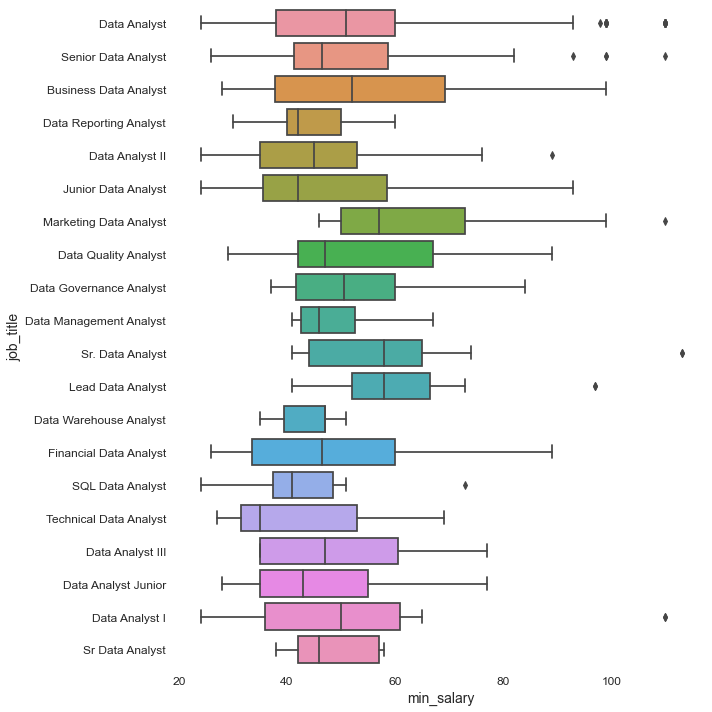

In [32]:
# Looking TOP20 distributions in Job_Title

top_20_job_titles = data2.job_title.value_counts().iloc[:20].index

# Creating a DF to receive Top20
df_top20_job_titles = data2[data2['job_title'].isin(top_20_job_titles)]

#Plotting Top20 Salaryes

sns.catplot(data=df_top20_job_titles, y='job_title', x='min_salary', kind='box', 
            height=10, aspect=1)

In [33]:
data.job_title.value_counts().head(30)

Data Analyst                                                                        404
Senior Data Analyst                                                                  90
Junior Data Analyst                                                                  30
Business Data Analyst                                                                28
Sr. Data Analyst                                                                     21
Data Analyst Junior                                                                  17
Data Quality Analyst                                                                 17
Data Analyst II                                                                      17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst          

**Let's look how many job_titles has 'senior' and 'management' in the text**

In [34]:

data2['job_title'].str.contains('Senior').value_counts()

False    1970
True      282
Name: job_title, dtype: int64

In [35]:
data2[data2['job_title'].str.contains('Management')].head(4)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,easy_apply,min_salary,max_salary,mean_salary
169,Data Management Analyst,$43K-$76K (Glassdoor est.),The Data Management Analyst is responsible for...,2.5,Brooklyn Community Services\n2.5,"Brooklyn, NY","Brooklyn, NY",201 to 500 employees,1886.0,Nonprofit Organization,Social Assistance,Non-Profit,$25 to $50 million (USD),False,43,76,59.5
188,"VP, Research Project Analyst/Data Management",$60K-$110K (Glassdoor est.),This VP Research Project Analyst role is a qua...,3.7,Citi\n3.7,"New York, NY","New York, NY",10000+ employees,1812.0,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),False,60,110,85.0
190,Data Management Analyst,$60K-$110K (Glassdoor est.),TSR is a premier National U.S. Staffing compan...,3.6,TSR Consulting\n3.6,"New York, NY","Hauppauge, NY",201 to 500 employees,1969.0,Company - Public,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),False,60,110,85.0
195,Investment Management Summer Analyst Program -...,$60K-$110K (Glassdoor est.),City\nNew York\n\nEducation Level\nBachelor's ...,3.8,Morgan Stanley\n3.8,"New York, NY","New York, NY",10000+ employees,1935.0,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),False,60,110,85.0


**As we can see, there are too many 'managements' jobs using differents titles. Let's group them.**

In [36]:
def replace_title(df, old, new):
    
    for job in df.job_title:
        found = re.findall(old.lower(), job.lower())
        if found: 
            df.job_title.replace(job, new, inplace = True)


In [37]:
replace_title(data2, 'management', 'Data Management')
replace_title(data2, 'senior' or 'sr' or 'sr.', 'Senior Data Analyst')
replace_title(data2, 'junior' or 'jr' or 'jr.', 'Junior Data Analyst')


In [38]:
data2.job_title.value_counts()

Data Analyst                                               404
Senior Data Analyst                                        277
Junior Data Analyst                                         60
Data Management                                             53
Business Data Analyst                                       28
                                                          ... 
Product Compliance Data Analyst                              1
Data Analyst (W2 Contract Position)                          1
Sr. Specialist Reporting Data Analyst /Engineer - Cloud      1
Sr. Data Business Analyst-Docutech                           1
Data Analyst - Bilingual English and Danish                  1
Name: job_title, Length: 1062, dtype: int64

In [39]:
# If not 'senior', 'junior', 'management' and contains 'DATA ANALYST', replace for 'DATA ANALYST'.

for job in data2.job_title:
    found = re.findall('senior', job.lower()) or re.findall('junior', job.lower()) or re.findall('management', job.lower())
    if not found:
        outros = re.findall('data', job.lower()) or re.findall('analyst', job.lower())
        if outros:
            data2.job_title.replace(job, 'Data Analyst', inplace = True)

In [40]:
data2.job_title.value_counts()

Data Analyst           1862
Senior Data Analyst     277
Junior Data Analyst      60
Data Management          53
Name: job_title, dtype: int64

## 4. Overall DataViz:

### Mean Salary

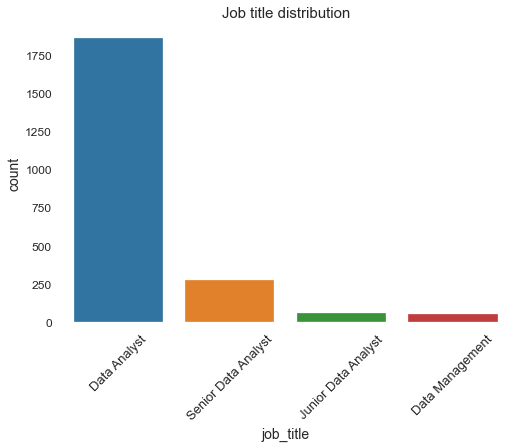

In [41]:
# Plotting Job_Title

sns.countplot('job_title', data=data2)
plt.title('Job title distribution', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.show()

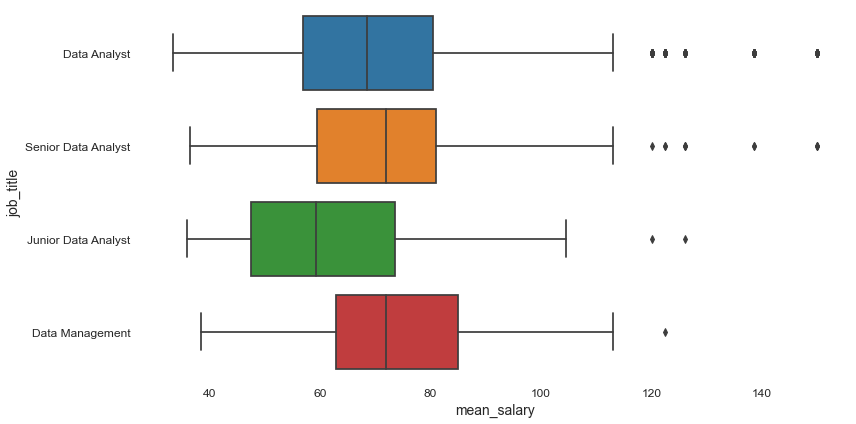

In [42]:
sns.catplot(data=data2, y='job_title', x='mean_salary', kind='box', 
            height=6, aspect=2)

### Min salaries per Job Title

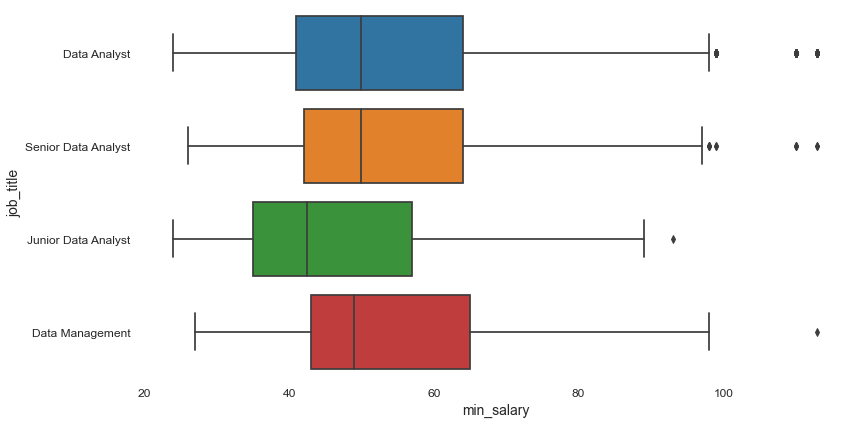

In [43]:
sns.catplot(data=data2, y='job_title', x='min_salary', kind='box', 
            height=6, aspect=2)

<AxesSubplot:title={'center':'Min Salary'}, xlabel='job_title', ylabel='min_salary'>

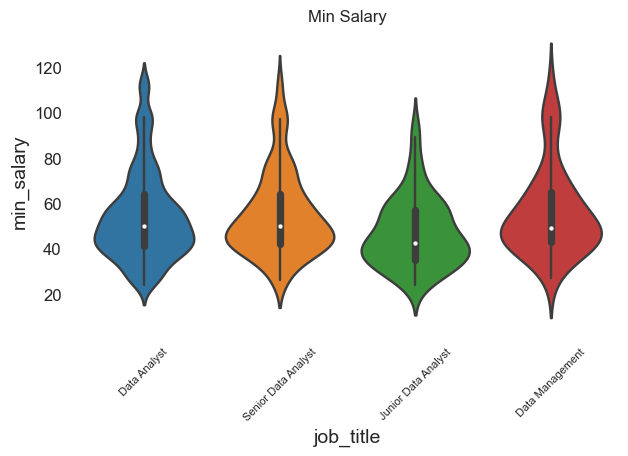

In [44]:
plt.figure(figsize=(7,4), dpi=100)
plt.title('Min Salary')
plt.xticks(rotation=45, fontsize=8)
sns.violinplot(x='job_title',y='min_salary', data=data2)

### Max salaries per job

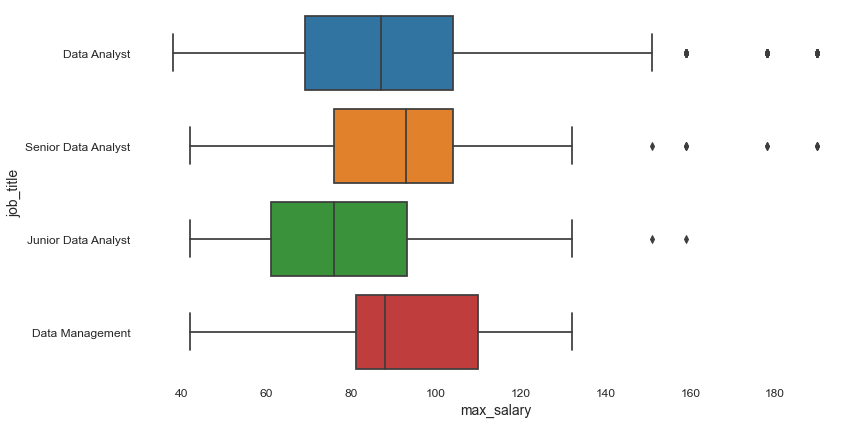

In [45]:
sns.catplot(data=data2, y='job_title', x='max_salary', kind='box', 
            height=6, aspect=2)


<AxesSubplot:title={'center':'Max Salary'}, xlabel='job_title', ylabel='max_salary'>

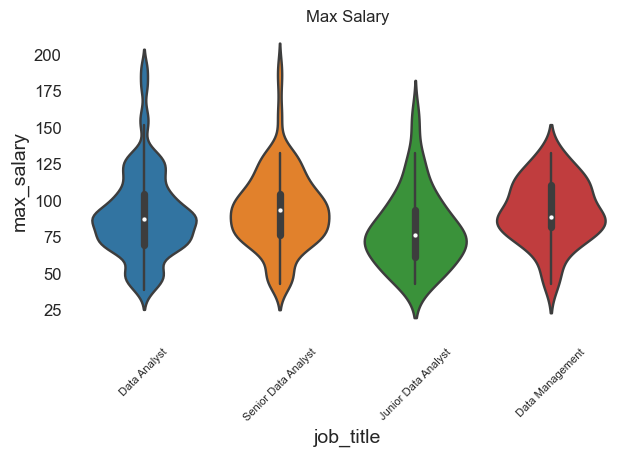

In [46]:
plt.figure(figsize=(7,4), dpi=100)
plt.title('Max Salary')
plt.xticks(rotation=45, fontsize=8)
sns.violinplot(x='job_title',y='max_salary', data=data2)

### Comparing Mean Salary per Job

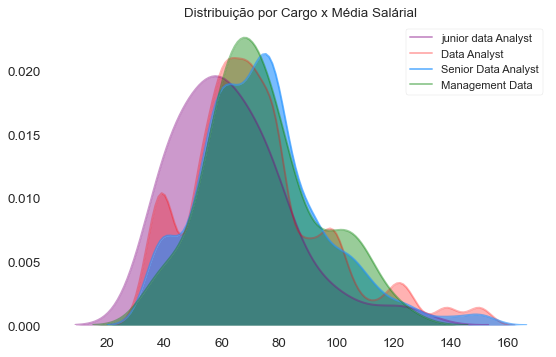

In [47]:
# Vamos observar a distribuição do Cargo x Média Salarial

plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data2['mean_salary'].loc[data2['job_title']=='Junior Data Analyst'], shade=True, 
            color='purple', label='junior data Analyst', alpha=0.4)
sns.kdeplot(data2['mean_salary'].loc[data2['job_title']=='Data Analyst'], shade=True, 
            color='red', label='Data Analyst', alpha=0.3)
sns.kdeplot(data2['mean_salary'].loc[data2['job_title']=='Senior Data Analyst'], shade=True, 
            color='dodgerblue', label='Senior Data Analyst', alpha=0.6)
sns.kdeplot(data2['mean_salary'].loc[data2['job_title']=='Data Management'], shade=True, 
            color='g', label='Management Data', alpha=0.4)
plt.title('Distribuição por Cargo x Média Salárial')
plt.show()

In [48]:
# Top10 companies wih higher mean salaries

data2.groupby('company_name')[['mean_salary']].mean().sort_values(['mean_salary'],ascending=False).head(10)

,mean_salary
company_name,
Moveworks\n5.0,150.0
Alteryx\n3.3,150.0
Enjoy\n3.8,150.0
Netflix\n3.9,150.0
Logic Planet\n3.1,150.0
LeanData\n4.0,150.0
Tesla Motors\n3.4,150.0
Nuro\n4.4,150.0
OSI Engineering\n4.5,150.0


In [49]:
# Gouping by higher RATING, COMPANY and MEAN SALARY

data2.groupby('company_name')[['rating', 'mean_salary']].mean().sort_values(['rating'],ascending=False).head(15)

,rating,mean_salary
company_name,,
Trivest\n5.0,5.0,68.000000
Professional Resource Group\n5.0,5.0,82.000000
Purity Technology LLC\n5.0,5.0,61.500000
VISTRADA\n5.0,5.0,85.000000
Mulberry Technology\n5.0,5.0,69.500000
Moveworks\n5.0,5.0,150.000000
American Recruiting & Consulting Group\n5.0,5.0,56.000000
"EDO, Inc.\n5.0",5.0,69.500000
Quinn Group\n5.0,5.0,122.500000


In [50]:
# Showing companies that has higher salaries and his ratings.

data2.groupby('company_name')[['mean_salary', 'rating']].mean().sort_values(['mean_salary'],ascending=False).head(15)

,mean_salary,rating
company_name,,
Moveworks\n5.0,150.0,5.000000
Alteryx\n3.3,150.0,3.300000
Enjoy\n3.8,150.0,3.800000
Netflix\n3.9,150.0,3.900000
Logic Planet\n3.1,150.0,3.100000
LeanData\n4.0,150.0,4.000000
Tesla Motors\n3.4,150.0,3.400000
Nuro\n4.4,150.0,4.400000
OSI Engineering\n4.5,150.0,4.500000


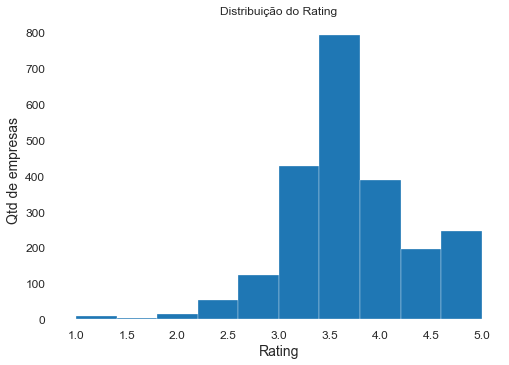

In [51]:
# Rating

plt.hist(data2['rating'])
plt.title('Distribuição do Rating')
plt.ylabel('Qtd de empresas')
plt.xlabel('Rating')
plt.show()

## 6. Questions/Hypotheses: Integrity

    1. Is there any 'Junior' earning MORE than 80k per year?
    2. Is there any 'Management' earning LESS than 50k per year?
    3. Is there a correletion between 'rating' and 'mean_salary'?



In [52]:
data2[data2['mean_salary'] > 80.0].loc[data2['job_title']=='Junior Data Analyst'].head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,easy_apply,min_salary,max_salary,mean_salary
185,Junior Data Analyst,$60K-$110K (Glassdoor est.),"Praescient Analytics, LLC (Praescient) is a Ve...",3.100000,Praescient Analytics\n3.1,"New York, NY","Alexandria, VA",51 to 200 employees,2011.0,Company - Private,Consulting,Business Services,$10 to $25 million (USD),False,60,110,85.0
346,Junior Data Analyst,$77K-$132K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.000000,"Staffigo Technical Services, LLC\n5.0","New York, NY","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,77,132,104.5
495,Junior Data Analyst,$49K-$112K (Glassdoor est.),NOTE: Active DoD SECRET security clearance req...,3.731903,"Tamayo Federal Solutions, LLC","Portsmouth, VA",NaN,Unknown,NaN,Unknown,IT Services,NaN,Unknown / Non-Applicable,False,49,112,80.5
1260,Junior Data Analyst,$76K-$122K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.000000,"Staffigo Technical Services, LLC\n5.0","San Diego, CA","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,76,122,99.0
1294,Junior Data Analyst,$60K-$124K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.000000,"Staffigo Technical Services, LLC\n5.0","San Diego, CA","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),False,60,124,92.0


In [53]:
data2[data2['mean_salary'] < 50.0].loc[data2['job_title']=='Data Management']

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,easy_apply,min_salary,max_salary,mean_salary
302,Data Management,$27K-$52K (Glassdoor est.),Data Governance & Management (DG&M) is a globa...,3.9,JPMorgan Chase\n3.9,"Brooklyn, NY","New York, NY",10000+ employees,1799.0,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),False,27,52,39.5
509,Data Management,$30K-$54K (Glassdoor est.),Data Management Analyst II\n\nJob no:\n\nWork ...,3.3,Shands Jacksonville\n3.3,"Alachua, FL","Jacksonville, FL",1001 to 5000 employees,1984.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),False,30,54,42.0
1137,Data Management,$37K-$44K (Glassdoor est.),"Job Title\nSenior Data Management Analyst, Ent...",3.9,TD Bank\n3.9,"Mount Laurel, NJ","Toronto, Canada",10000+ employees,1855.0,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD),False,37,44,40.5
1703,Data Management,$35K-$42K (Glassdoor est.),We Are Hiring\n\nClinical Data Management - Te...,3.3,Ascension\n3.3,"Austin, TX","Saint Louis, MO",10000+ employees,1999.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),False,35,42,38.5


### Max and Min salaries

In [54]:
data2[['mean_salary', 'job_title']].loc[data2['mean_salary']== data2.mean_salary.min()].head(3)

,mean_salary,job_title
884,33.5,Data Analyst
885,33.5,Data Analyst
886,33.5,Data Analyst


In [55]:
data2[['mean_salary', 'job_title']].loc[data2['mean_salary']== data2.mean_salary.max()].head(3)

,mean_salary,job_title
1468,150.0,Data Analyst
1469,150.0,Senior Data Analyst
1470,150.0,Data Analyst


#### So, the minimum and maximum salaries belongs to 'Data Analyst', not Junior nor Managament. 


### Any correlation between salary and rating?

In [56]:
data2[['rating', 'mean_salary']].corr()

# Not that time...

,rating,mean_salary
rating,1.000000,0.039915
mean_salary,0.039915,1.000000


### Conclusions: We can't trut fully in this dataset. We need to extract more than what we did.

## 7. Feature Engineering

So, we know that is something odd in Job Title/Salaries. The highest salaries belongs to Data Analyst and also the Lowest.

Let's take a look at Job Description to find some clues.

Let' try extract the 'Job Title' from 'Job Description'. We are looking in Job Descriptions the jobs that has Juniors, Senior or Managament and reclassify them, if its wringly classified in Job Title.

Approuch:

    1º Create a new DF thar contains all 'Senior' occurences in Job_Description;
    2º We are looking for patterns and replace the job titles if it is necessary.
    3º We will do this to 'Junior' and 'Management' as well.

In [57]:
data3 = data2.copy()
data3.job_title.value_counts()

Data Analyst           1862
Senior Data Analyst     277
Junior Data Analyst      60
Data Management          53
Name: job_title, dtype: int64

In [58]:
description_senior = data3[data3['job_description'].str.contains('Senior' or 'senior' or 'Sr.' or 'sr.')]

In [59]:
description_senior.shape

(281, 17)

<function matplotlib.pyplot.show(close=None, block=None)>

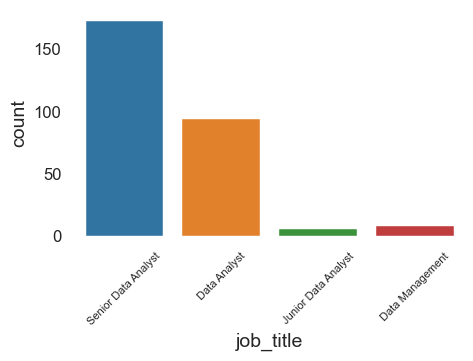

In [60]:
plt.figure(figsize=(5,3), dpi=100)
plt.xticks(rotation=45, fontsize=8)
sns.countplot('job_title', data=description_senior)
plt.show

### So, we can find the word 'Senior' in Data Analystar, Junior and also Management job titles.

Let's go into 'Data Analyst' job Descriptions seeking for 'Senior'.

In [61]:
seniors_ = description_senior.loc[description_senior['job_title'] == 'Data Analyst']

In [62]:
seniors_.head(3)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,easy_apply,min_salary,max_salary,mean_salary
30,Data Analyst,$46K-$87K (Glassdoor est.),Our Mission\n\nMove people.\n\nOur Values\n\nW...,3.6,Revel\n3.6,"Brooklyn, NY","Seattle, WA",51 to 200 employees,2005.0,Company - Private,Consulting,Business Services,$25 to $50 million (USD),True,46,87,66.5
62,Data Analyst,$51K-$88K (Glassdoor est.),OverviewAt Perficient you'll deliver mission-c...,3.6,Perficient\n3.6,"New York, NY","Saint Louis, MO",1001 to 5000 employees,1998.0,Company - Public,IT Services,Information Technology,$500 million to $1 billion (USD),False,51,88,69.5
63,Data Analyst,$51K-$88K (Glassdoor est.),OverviewAt Perficient you'll deliver mission-c...,3.6,Perficient\n3.6,"New York, NY","Saint Louis, MO",1001 to 5000 employees,1998.0,Company - Public,IT Services,Information Technology,$500 million to $1 billion (USD),False,51,88,69.5


**Let's see the fully job description of index1, that is classified as 'Data Analyst'**

In [63]:
seniors_.job_description.to_list()[1]



'OverviewAt Perficient you\'ll deliver mission-critical technology and business solutions to Fortune 500 companies and some of the most recognized brands on the planet. And you\'ll do it with cutting-edge technologies, thanks to our close partnerships with the world\'s biggest vendors. Our network of offices across North America, as well as locations in India and China, will give you the opportunity to spread your wings, too.We\'re proud to be publicly recognized as a "Top Workplace" year after year. This is due, in no small part, to our entrepreneurial attitude and collaborative spirit that sets us apart and keeps our colleagues impassioned, driven, and fulfilled.Perficient currently has a career opportunity for a Data Analyst - Data Scanning utilizing Rochade in our NYC office.Job Overview:The role of the Business Consultant is for individuals passionate about identifying and delivering the right Business solution for each client. Our Business Consultants have a keen Business orienta

**Bingo**

As you can see, even classified as Data Analyst (Job Title), the description refers to a Senior Job: 

    (...) The Senior Business Consultant will be involved in the strategic planning of an engagement or helping the client 
     make decisions about their future IT direction (...)
    (...)7-10 Years of relevant work experience requirede (...)

**So, to have more accurace, we have to handle Job Description column and find the real Jobs Titles**

<function matplotlib.pyplot.show(close=None, block=None)>

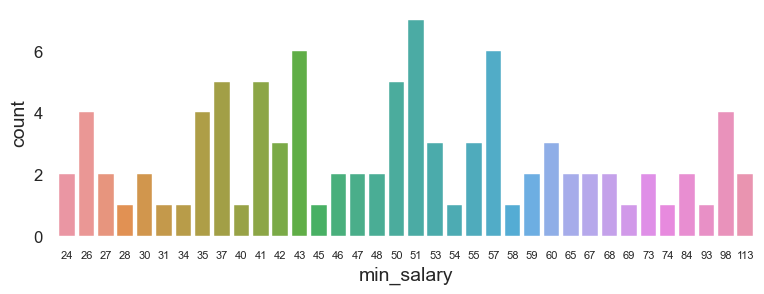

In [64]:
plt.figure(figsize=(9,3), dpi=100)
plt.xticks(fontsize=8)
sns.countplot('min_salary', data=seniors_)
plt.show

### Let's just see the words close to 'Senior' word in  the 'Job Descriptions' 

In [65]:
pattern=re.compile('...........................senior..................................', flags=re.IGNORECASE)

[re.findall(pattern, x) for x in seniors_.job_description]

[['es. You will report to the Senior Analyst, Data Science and Analyti'],
 ['get easily discouraged.The Senior Business Consultant will be invol',
  'e a project has begun, the Senior Business Consultant will facilita',
  'Experience techniques. The Senior Business Consultant may be respon',
  'ations, and prototypes.The Senior Business Consultant works with th',
  'ad Business Consultant and Senior Project Managers to assist with d',
  ' delivery of projects. The Senior Business Consultant will interfac'],
 ['a career opportunity for a Senior Business Consultant in our NYC of',
  'get easily discouraged.The Senior Business Consultant will be invol',
  'e a project has begun, the Senior Business Consultant will facilita',
  'Experience techniques. The Senior Business Consultant may be respon',
  'ations, and prototypes.The Senior Business Consultant works with th',
  'ad Business Consultant and Senior Project Managers to assist with d',
  ' delivery of projects. The Senior Business Con

#### Seeing the occurences, we can confirm that, for some positions, despite the Job Titles are classifed as  'Data Analyst', the jobs refers to 'Seniors Data Analyst'.

For what we can see, the following words in 'Data Analyst' belongs to Senior positions:

    Senior Business Consultant
    Solutions Analyst - Senior
    Senior Data Analyst
    Senior Data EngineerAnalyst
    Senior Data Systems
    Senior Metadata Analyst
    Senior Analyst/Analyst

So, we can replace them all. Warning: In my opinion, It's NOT appropriate use NLTK's methods, once some positions has the 'Senior' word, but it's not a Senior positions such as:

    supervision of the Senior
    reports to the Senior
    work directly with senior
    etc.


In [66]:
data4 = data3.copy()

count = 0
senior = ['Senior Business Consultant', 'Solutions Analyst - Senior', 'Senior Data Analyst', 'Senior Data EngineerAnalyst', 
          'Senior Data Systems', 'Senior Metadata Analyst', 'Senior Analyst/Analyst']

idx_to_replace = []


for position in senior:
    for idx, phrase in enumerate(data4.job_description):
        found = re.findall(position, phrase)
        if found:
            idx_to_replace.append(idx)
           
for idx in idx_to_replace:
    data4.job_title[idx] = 'Senior Data Analyst'


<ipython-input-66-7bb7a892f018>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.job_title[idx] = 'Senior Data Analyst'


In [67]:
data4.job_title.value_counts()

Data Analyst           1812
Senior Data Analyst     329
Junior Data Analyst      59
Data Management          52
Name: job_title, dtype: int64

In [68]:
# Doing the same for JUNIOR

description_jr = data4[data4['job_description'].str.contains('Junior' or 'junior' or 'Jr.' or 'jr.')]

In [69]:
junior_ = description_jr.loc[description_jr['job_title'] == 'Data Analyst']

In [70]:
### Vamos fazer uso das REGEX. Dentro da coluna 'Job_Description', vamos ver as palavras próximas a 'Senior'.

pattern=re.compile('..................................Junior....................................' or \
                   '...............Jr..............', flags=re.IGNORECASE)
    
[re.findall(pattern, x) for x in junior_.job_description]

[[' lending performance metrics. The Junior Data Analyst will work closely with'],
 ['nc. Is currently recruiting for a Junior Compensation Analyst to work from o'],
 [],
 [],
 ['An opportunity is available for a Junior Civil Engineer, Civil Engineer-in-T'],
 [],
 [],
 []]

In [71]:
idx_to_replace_jr = []

for idx, phrase in enumerate(data4.job_description):
    found = re.findall('The Junior Data Analyst will work closely', phrase)
    found1 = re.findall('is available for a Junior Civil', phrase)
    found2 = re.findall('recruiting for a Junior Compensation', phrase)
    if found or found1 or found2:
        idx_to_replace_jr.append(idx)

for idx in idx_to_replace_jr:
    data4.job_title[idx] = 'Junior Data Analyst'


<ipython-input-71-4f921a2a7660>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.job_title[idx] = 'Junior Data Analyst'


In [72]:
data4.job_title.value_counts()

Data Analyst           1809
Senior Data Analyst     329
Junior Data Analyst      62
Data Management          52
Name: job_title, dtype: int64

## 8. Perfumery: Cleanning data

DROPPING:

    job_description --> Extracted all we wanted
    headquarter --> Small relevance
    founded --> Small relevante, 29% missing data.
    revenue --> Highest frequency os 35% and it's associated to 'Unknown'. The second higher has 10% frequency.
    easy_apply --> More than 90% 'False'
    industry --> High cardinality: 88 unique values. Let's use 'Sector' that has 24 unique values.

CHANGING:

    location --> Let's split the locations in States and Cities.
    sector --> 24 unique values. Let's use the Top7 and rename the other to 'others'.

KEEPING:

    rating
    company_name
    job_title
    salaries
    
    

In [73]:
data5 = data4.copy()

In [74]:
# DROPPING

data5.drop(columns=['job_description', 'headquarters', 'founded', 'revenue', 'easy_apply', 'industry'], inplace = True)

In [75]:
data5.sector.value_counts()[0:10]

Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Education                  52
Insurance                  51
Accounting & Legal         43
Media                      42
Manufacturing              40
Retail                     38
Name: sector, dtype: int64

In [76]:
# Top7 Sectors

top7_setores = data5.sector.value_counts()[0:6]
top7_setores = top7_setores.index

[data5['sector'].replace(value, 'Others', inplace=True) for value in data5.sector if value not in top7_setores]

data5.sector.value_counts()

Others                    735
Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Education                  52
Insurance                  51
Name: sector, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

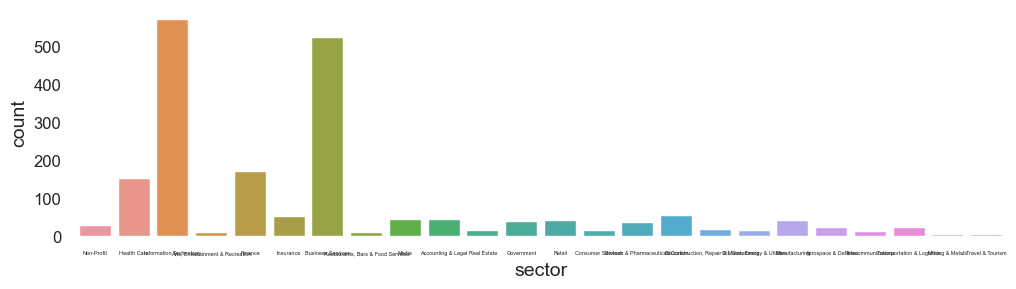

In [77]:
# Before 'Sectors' transformation

plt.figure(figsize=(12,3), dpi=100)
plt.xticks(fontsize=4)
sns.countplot('sector', data=data4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

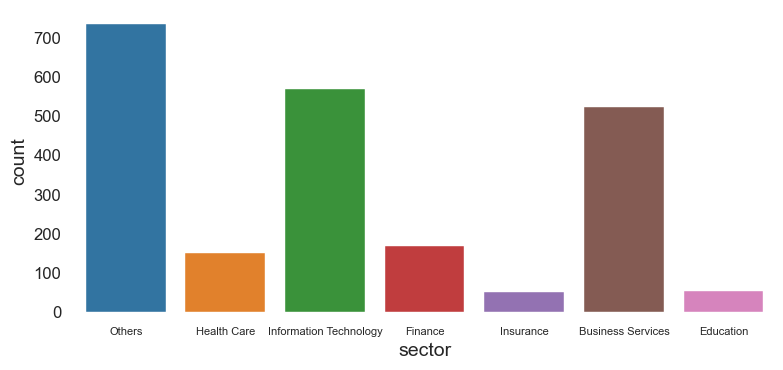

In [78]:
# after Sectors transformation 
plt.figure(figsize=(9,4), dpi=100)
plt.xticks(fontsize=8)
sns.countplot('sector', data=data5)
plt.show

In [79]:
# Location

data5.location.head(20)

0        New York, NY
1        New York, NY
2        New York, NY
3        New York, NY
4        New York, NY
5        New York, NY
6        New York, NY
7        New York, NY
8        New York, NY
9        New York, NY
10       New York, NY
11      Fairfield, NJ
12       New York, NY
13       New York, NY
14    Jersey City, NJ
15       New York, NY
16       New York, NY
17       New York, NY
18       New York, NY
19       New York, NY
Name: location, dtype: object

In [80]:
# Transforma cidade por Estados

data5['state'] = [value.split(',')[1].strip() for value in data5.location]
data5['city'] = [value.split(',')[0].strip() for value in data5.location]

data5[['city','state']].head()

,city,state
0,New York,NY
1,New York,NY
2,New York,NY
3,New York,NY
4,New York,NY


In [81]:
data5.state.value_counts()

CA          626
TX          394
NY          345
IL          164
PA          114
AZ           97
NC           89
CO           88
NJ           86
WA           54
VA           48
OH           35
UT           33
FL           27
IN           23
DE           11
Arapahoe      8
GA            4
SC            3
KS            3
Name: state, dtype: int64

WTF is 'Arapahoe'?? GOOGLE Helps --> Colorado!! ¬¬

In [82]:
data5['state'].replace('Arapahoe', 'CO', inplace=True)

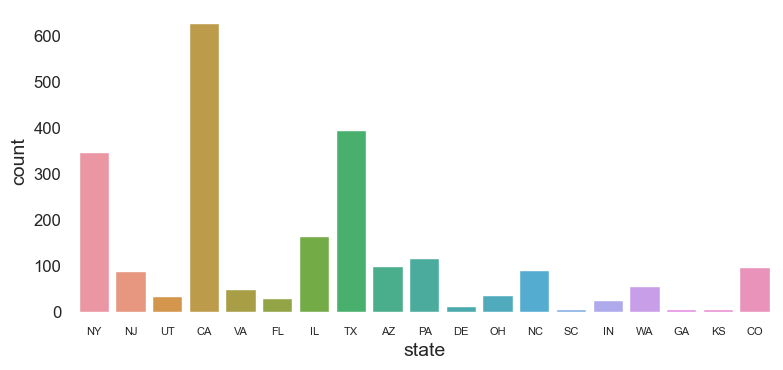

In [83]:
plt.figure(figsize=(9,4), dpi=100)
plt.xticks(fontsize=8)
sns.countplot('state', data=data5)
plt.show()

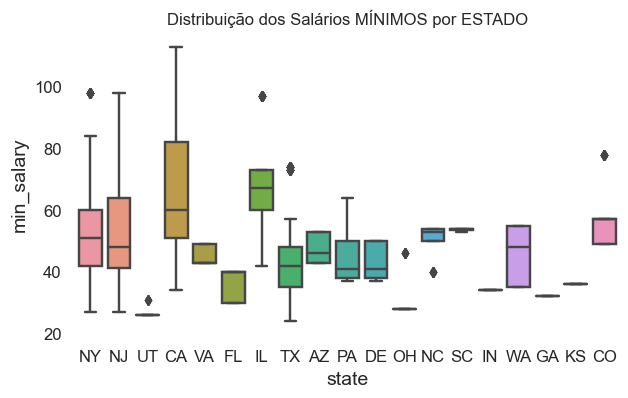

In [84]:
# Mininum Salaries per State

plt.figure(figsize=(7,4), dpi=100)
plt.title('Distribuição dos Salários MÍNIMOS por ESTADO')
sns.boxplot(x='state',y='min_salary', data=data5)
plt.show()

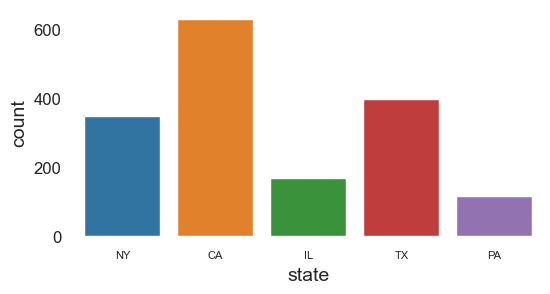

In [85]:
# Comparing top5 States

top5_states = data5['state'].value_counts().iloc[0:5].index
df_top5_states = data5[data5['state'].isin(top5_states)]

plt.figure(figsize=(6,3), dpi=100)
sns.countplot('state', data=df_top5_states)
plt.xticks(fontsize=8)
plt.show()

## 9. Looking for Latitude and Logitude: GeoCoder

Well... It's a dumb solution. Geocoder has acess limited, so I created a 3 lists (location, latitude and longitude) instead of a tuple's dictionary or or direct input in data5['lat'] / data5['lng'].

Since I can't use GeoCoder for the nexts 24h, we have to work the (bad) tools we have.


In [86]:
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

In [87]:
data5['lat'] = data5['location']
data5['lng'] = data5['location']

In [88]:
import settings

key = geocoder_API_KEY
geocoder = OpenCageGeocode(key)
query = data5['location'][0]
result = geocoder.geocode(query)

In [163]:
place = []
lat = []
lng = []

for location in data5['location']:
    if location not in place:
        query = location
        place.append(location)
        result = geocoder.geocode(query)
        lat.append(result[0]['geometry']['lat'])
        lng.append(result[0]['geometry']['lng'])

In [388]:
coord = {}
for k, v in enumerate(place):
    coord[v] = list(zip(lat, lng))[k]

for place in data5.lat:
    if place in coord.keys():
        data5['lat'].replace(place, coord[place][0], inplace=True), \
        data5['lng'].replace(place, coord[place][1], inplace=True)

In [390]:
data5[['location', 'lat', 'lng']].tail()

,location,lat,lng
2248,"Denver, CO",39.739236,-104.984862
2249,"Centennial, CO",39.568064,-104.977831
2250,"Denver, CO",39.739236,-104.984862
2251,"Centennial, CO",39.568064,-104.977831
2252,"Broomfield, CO",39.920383,-105.069146


# 10. Next steps: GeoPlotting